In [1]:
# Import packages
import scanpy as sc
import numpy as np

In [2]:
# Variables
file = "../data/BCB/full.h5ad"
hlca_file = "../data/HLCA/core.h5ad"

In [3]:
# Read data
ds = sc.read(file)
ds

AnnData object with n_obs × n_vars = 320709 × 36601
    obs: 'sample_id', 'libname', 'sample', 'cohort', 'lane', 'index', 'TotalSeq.A', 'Chemistry', 'run', 'frozen', 'freeze_method', 'virus_SCoV2', 'virus_HSV.1', 'virus_CMV', 'virus_HHV6A', 'virus_HHV6B', 'hto_clust', 'libsize', 'nfeatures', 'percent.mt', 'qc_linear', 'qc_adaptive', 'batch', 'ann_level_1_pred', 'ann_level_1_uncertainty', 'ann_level_2_pred', 'ann_level_2_uncertainty', 'ann_level_3_pred', 'ann_level_3_uncertainty', 'ann_level_4_pred', 'ann_level_4_uncertainty', 'ann_level_5_pred', 'ann_level_5_uncertainty', 'ann_finest_level_pred', 'ann_finest_level_uncertainty', 'cell_type_pred', 'cell_type_uncertainty'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'seurat2000', 'seurat5000'
    uns: 'hvg', 'hvg_keys', 'log1p'
    obsm: 'X_seurat2000_fastMNN_n10k10', 'X_seurat2000_fastMNN_n30k10', 'X_seurat2000_fa

In [54]:
# Export transferred labels
ind = ds.obs.columns[ds.obs.columns.str.contains("cell_type")]
ind = ind.append(ds.obs.columns[ds.obs.columns.str.contains("ann_level")])
df = ds.obs[ind]
df.to_csv("../data/BCB/full_hlca-labels.csv")

In [60]:
# Export HLCA latent embedding
arr = ds.obsm["hlca"]
arr.tofile("../data/BCB/full_hlca-latent.csv", sep=",")

In [4]:
# Load HLCA
hlca = sc.read(hlca_file)
hlca

AnnData object with n_obs × n_vars = 584884 × 28024
    obs: 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'sample', 'study', 'donor_id', 'smoking_status', 'BMI', 'condition', 'subject_type', 'sample_type', "3'_or_5'", 'sequencing_platform', 'cell_ranger_version', 'fresh_or_frozen', 'dataset', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_highest_res', 'n_genes', 'size_factors', 'log10_total_counts', 'mito_frac', 'ribo_frac', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'scanvi_label', 'leiden_1', 'leiden_2', 'leiden_3', 'anatomical_region_ccf_score', 'entropy_study_leiden_3', 'entropy_dataset_leiden_3', 'entrop

/home/odietric/miniconda3/envs/covid19-bal-atlas-integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


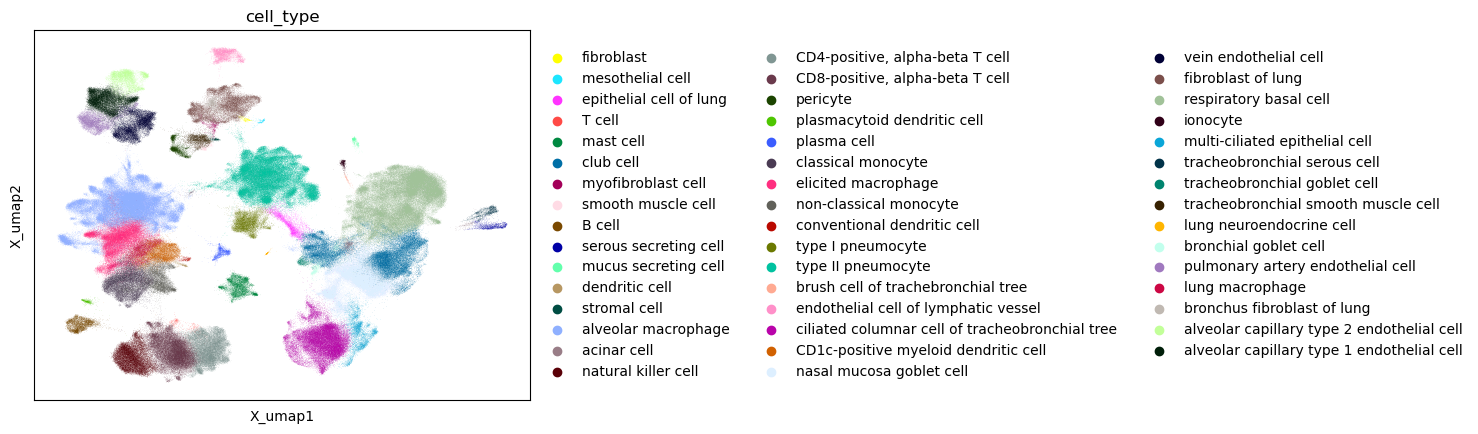

In [35]:
# Show reference map
sc.pl.embedding(hlca, basis="X_umap", color="cell_type")

In [10]:
# Compute UMAP
sc.pp.neighbors(ds, use_rep="counts_seurat2000_scVI_n30l1h128")
sc.tl.umap(ds, min_dist=0.3)

In [17]:
sc.tl.umap(ds, min_dist=0.3)

/home/odietric/miniconda3/envs/covid19-bal-atlas-integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


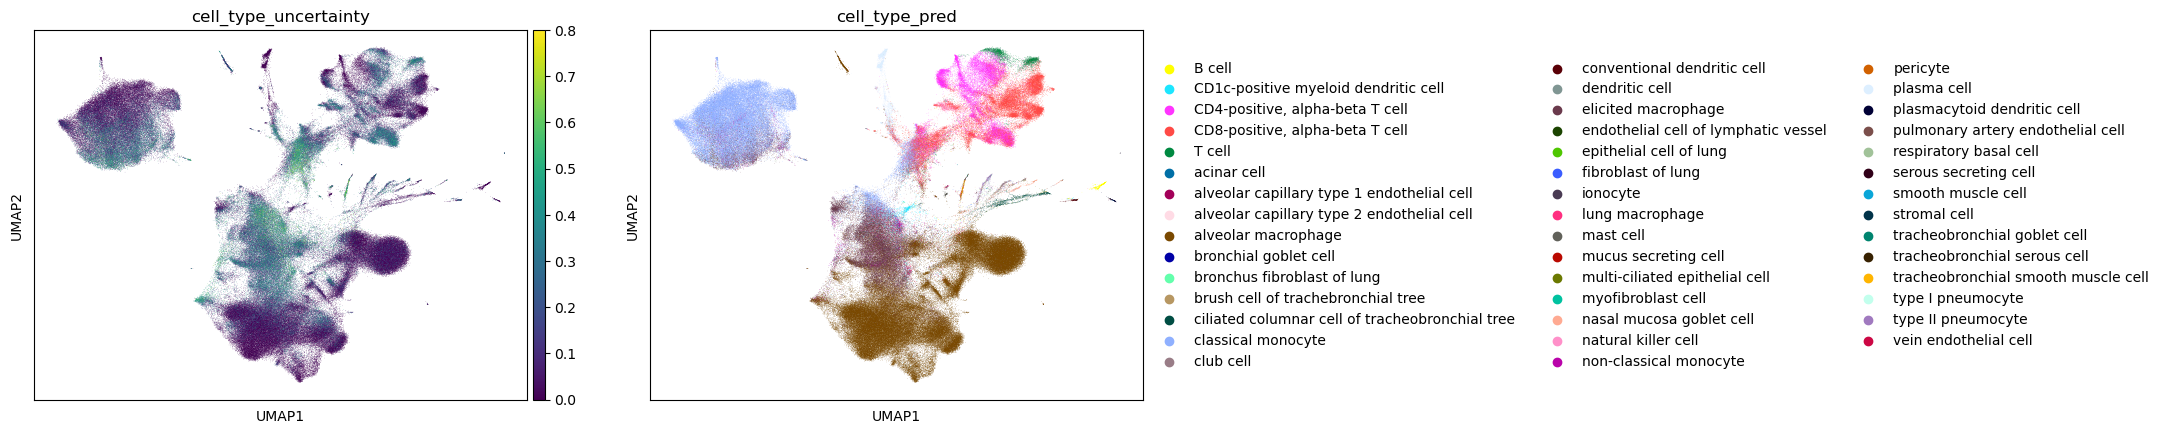

In [20]:
sc.pl.embedding(ds, basis="umap", color=["cell_type_uncertainty", "cell_type_pred"])

In [35]:
ds.obs["score"] = ds.obs["cell_type_pred"].values.isin(["T cell"]).astype(int)

In [41]:
ds.obs["score"] = ds.obs["sample"].values.isin(["BAL_1"]).astype(str)

/home/odietric/miniconda3/envs/covid19-bal-atlas-integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/odietric/miniconda3/envs/covid19-bal-atlas-integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


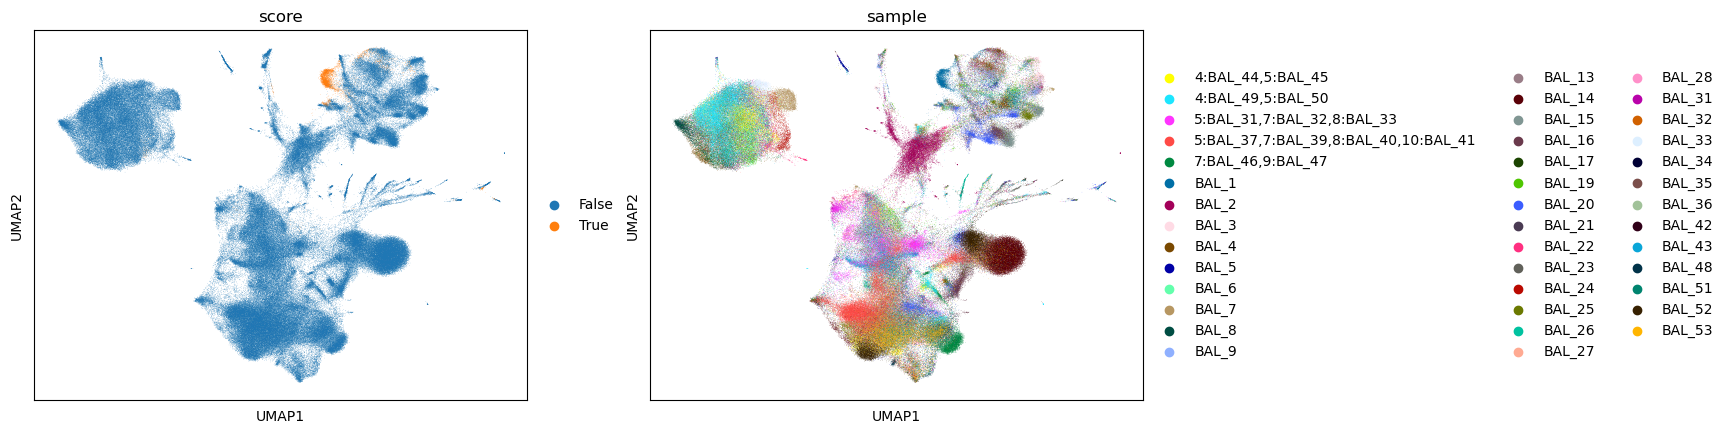

In [43]:
sc.pl.embedding(ds, basis="umap", color=["score", "sample"])

In [12]:
# Put normalized (cp10k) counts in X
ds.X = ds.layers["cp10k"]

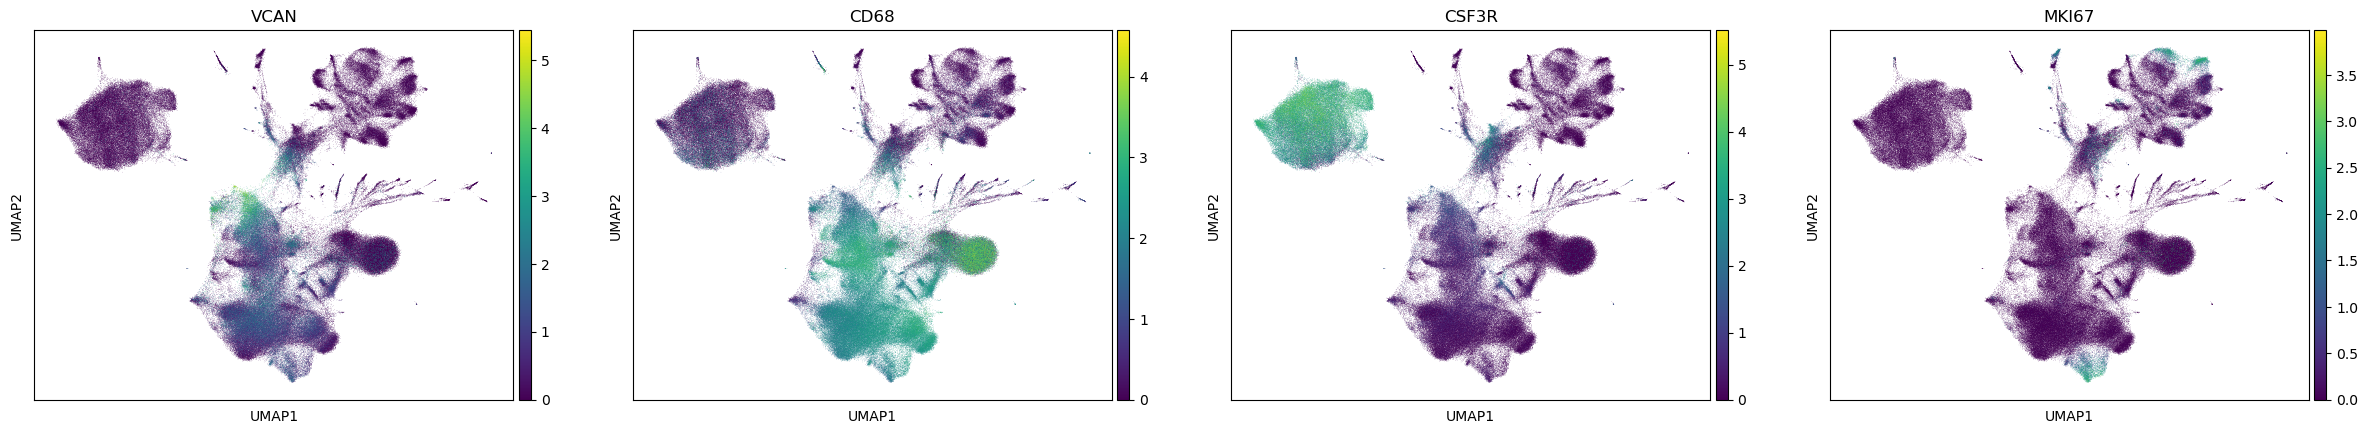

In [19]:
# Show marker genes
sc.pl.umap(ds, color=["VCAN", "CD68", "CSF3R", "MKI67"])

In [58]:
hlca.var.index = hlca.var.feature_name.values
hlca.var

,n_cells,highly_variable,means,dispersions,feature_is_filtered,feature_name,feature_reference,feature_biotype
TSPAN6,106120,False,0.172146,0.962372,False,TSPAN6,NCBITaxon:9606,gene
TNMD,305,False,0.000224,0.701593,False,TNMD,NCBITaxon:9606,gene
DPM1,140518,False,0.207243,0.859629,False,DPM1,NCBITaxon:9606,gene
SCYL3,31464,False,0.034430,0.925702,False,SCYL3,NCBITaxon:9606,gene
C1orf112,10484,False,0.011548,0.960026,False,C1orf112,NCBITaxon:9606,gene
...,...,...,...,...,...,...,...,...
RP11-11M20.4,2701,False,0.002350,0.955800,False,RP11-11M20.4,NCBITaxon:9606,gene
LLNLR-245B6.1,73401,False,0.093291,0.910759,False,LLNLR-245B6.1,NCBITaxon:9606,gene
MGC4859,131,False,0.000159,0.410029,False,MGC4859,NCBITaxon:9606,gene
RP11-107E5.4,22,False,0.000028,0.631858,False,RP11-107E5.4,NCBITaxon:9606,gene


In [8]:
# Prepare query
print("Preparing query dataset...")
query = ds.copy()
query.X = query.layers["counts"]
query.obs["dataset"] = query.obs.sample
query.obs["scanvi_label"] = "unlabeled"
query.var["gene_name"] = query.var.index.tolist()
query.var.index = query.var["gene_ids"].values

Preparing query dataset...


/home/odietric/miniconda3/envs/covid19-bal-atlas-scarches/lib/python3.10/site-packages/anndata/_core/anndata.py:1391: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  warnings.warn(


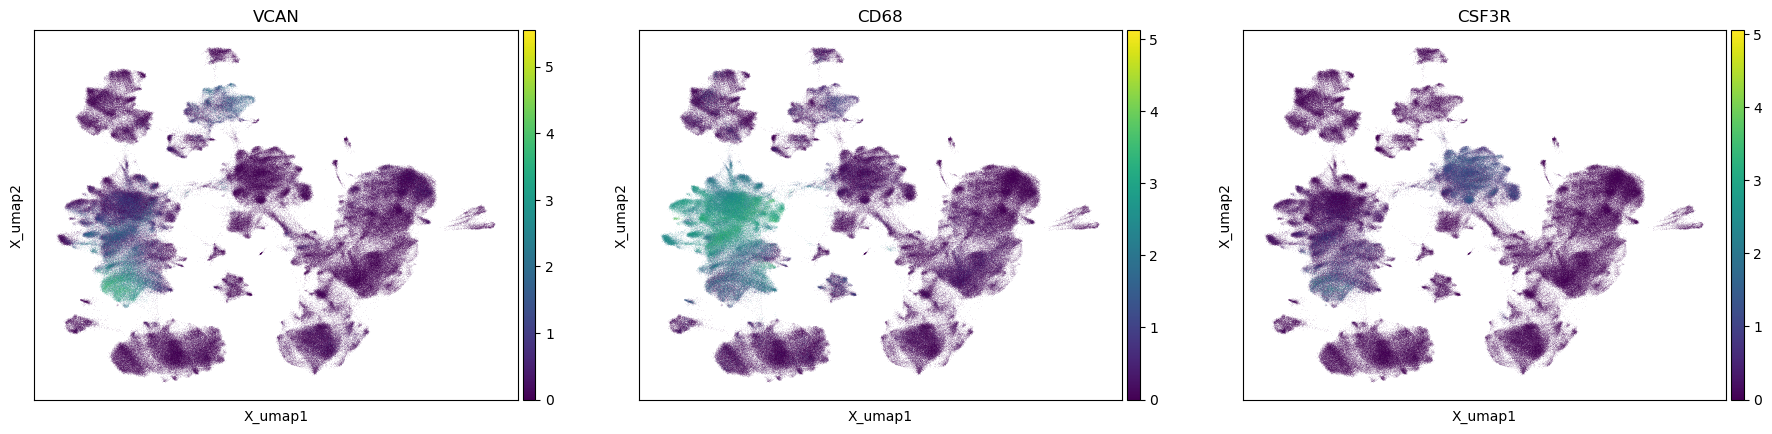

In [38]:
sc.pl.embedding(hlca, basis="X_umap", gene_symbols="feature_name", layer="X", color=["VCAN", "CD68", "CSF3R"])

In [39]:
ds.var

,gene_ids,feature_types,genome,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection,seurat2000,seurat5000
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38-viral,False,0.000010,-0.301530,-0.441621,0,False,False,False
FAM138A,ENSG00000237613,Gene Expression,GRCh38-viral,False,0.000000,0.000000,0.000000,0,False,False,False
OR4F5,ENSG00000186092,Gene Expression,GRCh38-viral,False,0.000020,-0.003792,-0.073011,0,False,False,False
AL627309.1,ENSG00000238009,Gene Expression,GRCh38-viral,True,0.042494,1.341766,0.546360,16,False,False,True
AL627309.3,ENSG00000239945,Gene Expression,GRCh38-viral,False,0.000133,-0.203756,-0.590829,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38-viral,False,0.000037,-0.026588,-0.114334,0,False,False,False
AC023491.2,ENSG00000278633,Gene Expression,GRCh38-viral,False,0.000086,-0.003009,-0.141956,0,False,False,False
AC007325.1,ENSG00000276017,Gene Expression,GRCh38-viral,False,0.000251,0.030167,-0.146374,2,False,False,False
AC007325.4,ENSG00000278817,Gene Expression,GRCh38-viral,False,0.020578,0.540527,-0.244940,0,False,False,False


In [42]:
ds.obs["sample"]

AAACCCAGTTCCGTTC-1      BAL_1
AAACCCATCACCATCC-1      BAL_1
AAACCCATCTGAGATC-1      BAL_1
AAACCCATCTGGGATT-1      BAL_1
AAACGAAAGTATGTAG-1      BAL_1
                        ...  
TTTGTTGCAAGAGGCT-41    BAL_53
TTTGTTGCACTTCTCG-41    BAL_53
TTTGTTGCAGTTGTCA-41    BAL_53
TTTGTTGGTAATGCGG-41    BAL_53
TTTGTTGGTGATAGAT-41    BAL_53
Name: sample, Length: 320709, dtype: category
Categories (41, object): ['4:BAL_44,5:BAL_45', '4:BAL_49,5:BAL_50', '5:BAL_31,7:BAL_32,8:BAL_33', '5:BAL_37,7:BAL_39,8:BAL_40,10:BAL_41', ..., 'BAL_48', 'BAL_51', 'BAL_52', 'BAL_53']